# DATA ENGINEERING

### Import Libraries

In [1]:
using LibPQ
using Plots
using MLBase
using DataFrames
using Statistics
using StatsPlots
using PyCall
@pyimport pickle
using ScikitLearn: fit!,predict,@sk_import

### Connect To PostGresSQL Database

In [2]:
conn = LibPQ.Connection("host=localhost user=postgres password=123456 dbname=pypost")

PostgreSQL connection (CONNECTION_OK) with parameters:
  user = postgres
  password = ********************
  channel_binding = prefer
  dbname = pypost
  host = localhost
  port = 5432
  client_encoding = UTF8
  options = -c DateStyle=ISO,YMD -c IntervalStyle=iso_8601 -c TimeZone=UTC
  application_name = LibPQ.jl
  sslmode = prefer
  sslcompression = 0
  sslsni = 1
  ssl_min_protocol_version = TLSv1.2
  gssencmode = disable
  krbsrvname = postgres
  target_session_attrs = any

### Connect To Table

In [3]:
query = "SELECT * FROM smart_watch"
result = LibPQ.execute(conn, query)

PostgreSQL result

### Store in DataFrame

In [4]:
smart_watch = DataFrame(result)

,Brand,Model,Operating System,Connectivity,Display Type
,String?,String?,String?,String?,String?
1,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina
2,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED
3,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED
4,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED
5,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED
6,Huawei,Watch 3 Pro,HarmonyOS,"Bluetooth, Wi-Fi, Cellular",AMOLED
7,TicWatch,E3,Wear OS,"Bluetooth, Wi-Fi, Cellular",IPS LCD
8,Oppo,Watch 2,ColorOS,"Bluetooth, Wi-Fi",AMOLED
9,Amazfit,GTR 3,Amazfit OS,"Bluetooth, Wi-Fi",AMOLED


### Close Database Connection

In [5]:
LibPQ.close(conn)

# EXPLORATORY DATA ANALYSIS

### Check number of rows and columns

In [6]:
size(smart_watch)

(374, 13)

### Check column names

In [7]:
names(smart_watch)

13-element Vector{String}:
 "Brand"
 "Model"
 "Operating System"
 "Connectivity"
 "Display Type"
 "Display Size inches"
 "Resolution"
 "Water Resistance meters"
 "Battery Life days"
 "Heart Rate Monitor"
 "GPS"
 "NFC"
 "Price USD"

### Data Profiling

In [8]:
describe(smart_watch)

,variable,mean,min,median,max,nmissing
,Symbol,Union…,Any,Union…,Any,Int64
1,Brand,,Amazfit,,Zepp,0
2,Model,,7,,ZenWatch 3,0
3,Operating System,,Amazfit OS,,watchOS,0
4,Connectivity,,Bluetooth,,"Bluetooth, Wi-Fi, NFC",0
5,Display Type,,AMOLED,,transflective,0
6,Display Size inches,1.36324,0.9,1.39,4.01,0
7,Resolution,,126 x 36,,960 x 192,0
8,Water Resistance meters,52.9893,1.5,50.0,200.0,0
9,Battery Life days,20.1257,1.0,10.0,1000.0,0


### Detect Outliers

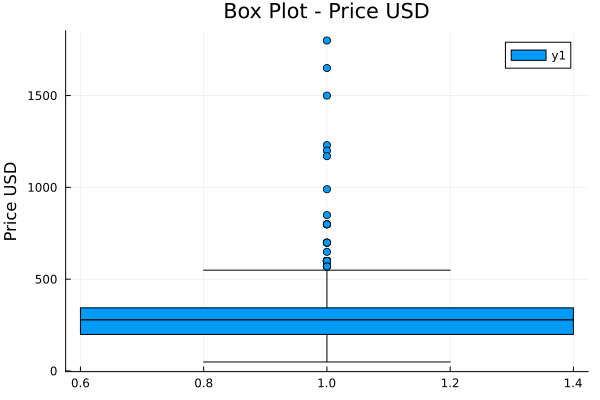

In [9]:
boxplot(smart_watch."Price USD", title = "Box Plot - Price USD", ylabel ="Price USD")

### Convert categorical features to numeric features

#### Brand

In [10]:
type_Brand = labelmap(smart_watch.Brand)
smart_watch.Brand = labelencode(type_Brand, smart_watch.Brand)
first(smart_watch.Brand,10)

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

#### Model

In [11]:
type_Model = labelmap(smart_watch.Model)
smart_watch.Model = labelencode(type_Model, smart_watch.Model)
first(smart_watch.Model,10)

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

#### Operating System

In [12]:
type_Os = labelmap(smart_watch."Operating System")
smart_watch."Operating System" = labelencode(type_Os, smart_watch."Operating System")
first(smart_watch."Operating System",10)

10-element Vector{Int64}:
 1
 2
 3
 4
 2
 5
 2
 6
 7
 8

#### Connectivity

In [13]:
type_Connectivity = labelmap(smart_watch.Connectivity)
smart_watch.Connectivity = labelencode(type_Connectivity, smart_watch.Connectivity)
first(smart_watch.Connectivity,10)

10-element Vector{Int64}:
 1
 1
 2
 2
 2
 1
 1
 2
 2
 3

#### Display Type

In [14]:
type_DisplayType = labelmap(smart_watch."Display Type")
smart_watch."Display Type" = labelencode(type_DisplayType, smart_watch."Display Type")
first(smart_watch."Display Type",10)

10-element Vector{Int64}:
 1
 2
 2
 2
 2
 2
 3
 2
 2
 2

#### Resolution

In [15]:
type_Resolution = labelmap(smart_watch.Resolution)
smart_watch.Resolution = labelencode(type_Resolution, smart_watch.Resolution)
first(smart_watch.Resolution,10)

10-element Vector{Int64}:
 1
 2
 3
 4
 3
 5
 6
 7
 8
 9

#### Heart Rate Monitor

In [16]:
type_HeartRateMonitor = labelmap(smart_watch."Heart Rate Monitor")
smart_watch."Heart Rate Monitor" = labelencode(type_HeartRateMonitor, smart_watch."Heart Rate Monitor")
first(smart_watch."Heart Rate Monitor",10)

10-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

#### GPS

In [17]:
type_GPS = labelmap(smart_watch.GPS)
smart_watch.GPS = labelencode(type_GPS, smart_watch.GPS)
first(smart_watch.GPS,10)

10-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

#### NFC

In [18]:
type_NFC = labelmap(smart_watch.NFC)
smart_watch.NFC = labelencode(type_NFC, smart_watch.NFC)
first(smart_watch.NFC,10)

10-element Vector{Int64}:
 1
 1
 2
 1
 1
 1
 1
 1
 1
 1

### Check for the implemented changes

In [19]:
first(smart_watch,5)

,Brand,Model,Operating System,Connectivity,Display Type,Display Size inches
,Int64,Int64,Int64,Int64,Int64,Float64?
1,1,1,1,1,1,1.9
2,2,2,2,1,2,1.4
3,3,3,3,2,2,1.3
4,4,4,4,2,2,1.58
5,5,5,2,2,2,1.28


### Correlation

In [20]:
# assume price is defined elsewhere
cols = [:Brand,:Model,Symbol("Operating System"),:Connectivity,Symbol("Display Type"),Symbol("Display Size inches"),:Resolution,Symbol("Price USD")]  # define subset with Symbol type

M = cor(Matrix(smart_watch[!, cols]))       # correlation matrix

8×8 Matrix{Float64}:
  1.0          0.593513     0.344189   …  -0.0986788   0.147582     0.151134
  0.593513     1.0          0.224794      -0.159247    0.298213     0.100636
  0.344189     0.224794     1.0            0.0575995   0.0717331   -0.145762
 -0.00531904   0.00764255  -0.039357      -0.243045    0.102953    -0.0501178
 -0.0673076    0.127787     0.183137      -0.288674    0.291185     0.196023
 -0.0986788   -0.159247     0.0575995  …   1.0         0.00908533  -0.0266429
  0.147582     0.298213     0.0717331      0.00908533  1.0          0.0439901
  0.151134     0.100636    -0.145762      -0.0266429   0.0439901    1.0

### Add color to the heatmap

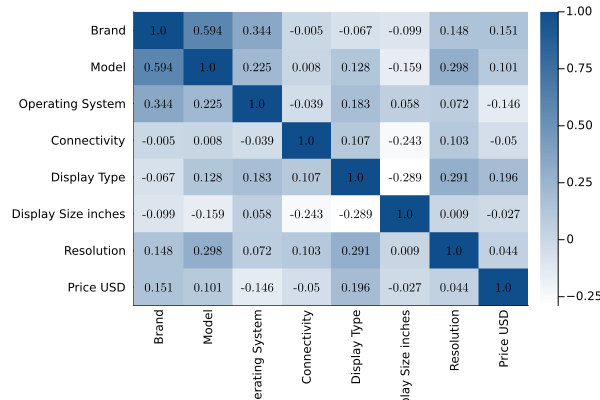

In [21]:
# PLOT
(n,m) = size(M)

heatmap(M, fc=cgrad([:white,:dodgerblue4]), xticks=(1:m,cols), xrot=90, yticks=(1:m,cols), yflip=true)
annotate!([(j, i, text(round(M[i,j],digits=3), 8,"Computer Modern",:black)) for i in 1:n for j in 1:m])

### Positive Correlation with Price USD

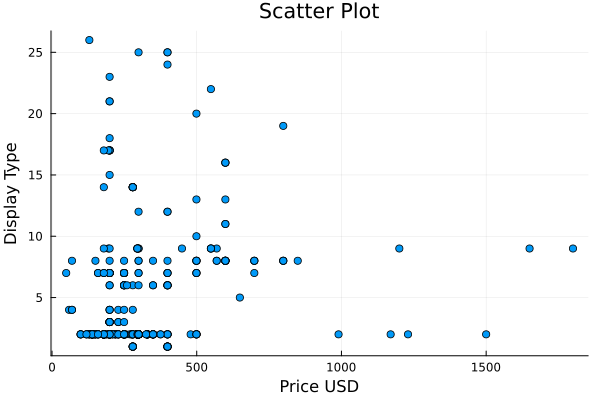

In [22]:
# Scatter plot
train_plot = scatter(smart_watch."Price USD", smart_watch."Display Type", title="Scatter Plot", xlabel = "Price USD", ylabel = "Display Type", legend = false)

### Negative Correlation with Price USD

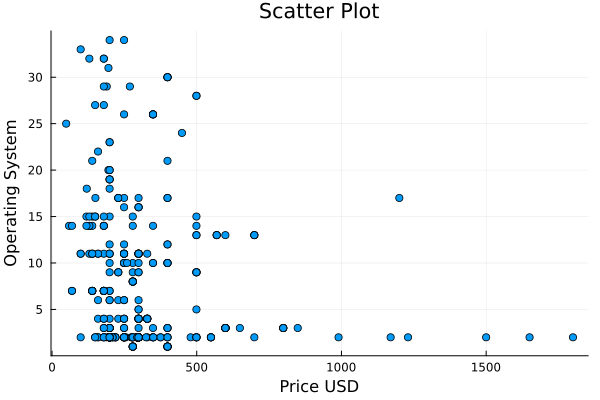

In [23]:
# Scatter plot
train_plot = scatter( smart_watch."Price USD", smart_watch."Operating System", title="Scatter Plot", xlabel = "Price USD", ylabel = "Operating System", legend = false)

# MODEL BUILDING

### Quickly remove space in column names

In [24]:
rename!(smart_watch, names(smart_watch) .=> replace.(string.(names(smart_watch)), " " => "_"))
first(smart_watch,5)

,Brand,Model,Operating_System,Connectivity,Display_Type,Display_Size_inches
,Int64,Int64,Int64,Int64,Int64,Float64?
1,1,1,1,1,1,1.9
2,2,2,2,1,2,1.4
3,3,3,3,2,2,1.3
4,4,4,4,2,2,1.58
5,5,5,2,2,2,1.28


### Split Data

In [25]:
X = [:Brand,:Operating_System,:Connectivity,:Display_Type,:Model,:Display_Size_inches,:Resolution,:Water_Resistance_meters,:Battery_Life_days,:Heart_Rate_Monitor,:GPS,:NFC]
Xfeatures = smart_watch[:, X]

,Brand,Operating_System,Connectivity,Display_Type,Model,Display_Size_inches
,Int64,Int64,Int64,Int64,Int64,Float64?
1,1,1,1,1,1,1.9
2,2,2,1,2,2,1.4
3,3,3,2,2,3,1.3
4,4,4,2,2,4,1.58
5,5,2,2,2,5,1.28
6,6,5,1,2,6,1.43
7,7,2,1,3,7,1.3
8,8,6,2,2,8,1.75
9,9,7,2,2,9,1.39


In [26]:
Ylabels = smart_watch[:, :Price_USD]

374-element Vector{Union{Missing, Int32}}:
 399
 249
 399
 229
 299
 499
 199
 199
 199
 279
 499
 299
 229
   ⋮
 179
 179
 119
 295
 350
 699
 199
 279
 349
 249
 159
 299

In [27]:
Xfeatures = Matrix(Xfeatures)

374×12 Matrix{Union{Missing, Float64}}:
  1.0   1.0  1.0   1.0    1.0  1.9    1.0   50.0  18.0  1.0  1.0  1.0
  2.0   2.0  1.0   2.0    2.0  1.4    2.0   50.0  40.0  1.0  1.0  1.0
  3.0   3.0  2.0   2.0    3.0  1.3    3.0   50.0  11.0  1.0  1.0  2.0
  4.0   4.0  2.0   2.0    4.0  1.58   4.0   50.0   6.0  1.0  1.0  1.0
  5.0   2.0  2.0   2.0    5.0  1.28   3.0   30.0  24.0  1.0  1.0  1.0
  6.0   5.0  1.0   2.0    6.0  1.43   5.0   50.0  14.0  1.0  1.0  1.0
  7.0   2.0  1.0   3.0    7.0  1.3    6.0   50.0   2.0  1.0  1.0  1.0
  8.0   6.0  2.0   2.0    8.0  1.75   7.0   50.0   4.0  1.0  1.0  1.0
  9.0   7.0  2.0   2.0    9.0  1.39   8.0   50.0  12.0  1.0  1.0  1.0
 10.0   8.0  3.0   2.0   10.0  1.65   9.0   50.0  30.0  1.0  1.0  1.0
 11.0   2.0  2.0   2.0   11.0  1.39   8.0   50.0   2.0  1.0  1.0  1.0
 12.0   2.0  2.0   2.0   12.0  1.4    8.0   50.0  45.0  1.0  1.0  1.0
 13.0   9.0  2.0   4.0   13.0  1.2    9.0   30.0   5.0  1.0  1.0  1.0
  ⋮                            ⋮                  

In [28]:
Ylabels = convert(Array, smart_watch[!,:Price_USD])

374-element Vector{Union{Missing, Int32}}:
 399
 249
 399
 229
 299
 499
 199
 199
 199
 279
 499
 299
 229
   ⋮
 179
 179
 119
 295
 350
 699
 199
 279
 349
 249
 159
 299

### Instantiate and Train model

#### LinearRegression 

In [29]:
@sk_import linear_model: LinearRegression

PyObject <class 'sklearn.linear_model._base.LinearRegression'>

In [30]:
model = LinearRegression(fit_intercept=true)
fit!(model, Xfeatures, Ylabels)

PyObject LinearRegression()

#### Crossvalidate LinearRegression Model

In [31]:
accuracy = sum(predict(model, Xfeatures) .== Ylabels) / length(Ylabels)
println("Accuracy of model: $accuracy")

Accuracy of model: 0.0


In [32]:
using ScikitLearn.CrossValidation: cross_val_score

cross_val_score(LinearRegression(), Xfeatures, Ylabels; cv=3) 

3-element Vector{Float64}:
 -0.06872546869410345
  0.11465308953043496
  0.13430193420039083

#### RandomForestRegressor

In [33]:
@sk_import ensemble: RandomForestRegressor

PyObject <class 'sklearn.ensemble._forest.RandomForestRegressor'>

In [34]:
model_1 = RandomForestRegressor()
fit!(model_1, Xfeatures, Ylabels)

PyObject RandomForestRegressor()

#### Crossvalidate RandomForestRegressor Model

In [35]:
accuracy = sum(predict(model_1, Xfeatures) .== Ylabels) / length(Ylabels)
println("Accuracy of model: $accuracy")

Accuracy of model: 0.11764705882352941


In [36]:
using ScikitLearn.CrossValidation: cross_val_score

cross_val_score(RandomForestRegressor(), Xfeatures, Ylabels; cv=3) 

3-element Vector{Float64}:
 0.6830288783983727
 0.7876804182229291
 0.27811208119892006

## SAVE THE MODEL

In [37]:
file = open("smart_watch_model.pkl", "w")
pickle.dump(model_1, file)
close(file)